# **Model Training**

In [66]:
import pandas as pd
import os
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

In [67]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/gabrielaarzate/Desktop/predicting_startup_succes/notebooks


In [68]:
notebook_directory = 'notebooks'
file_name = 'cleaned_data.csv'
file_path = os.path.join('..', 'notebooks', 'cleaned_data.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")


In [69]:
data_df

,state_code,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age,founded_at_days,first_funding_at_days,last_funding_at_days
0,0,0,0,0.1534,2.3425,0.0630,1.5836,8,2,3000000,...,0,1,0,0,0,0,4.2601,9339,9283,10194
1,0,1,0,0.2164,4.8438,0.2164,6.2466,22,5,70000000,...,1,0,0,0,0,0,6.2916,8582,8661,10350
2,1,2,0,1.8822,1.8822,1.6603,3.0247,5,1,1000000,...,0,0,0,0,0,0,4.7365,9132,9819,9819
3,1,2,0,1.3014,2.4685,0.0000,2.4685,3,2,1800000,...,2,0,0,0,0,0,3.0198,9740,10215,10641
4,0,3,0,1.2164,1.2164,1.4164,2.6822,6,1,5500000,...,3,0,0,0,0,0,2.6804,9862,10306,10306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1,2,1,0.0000,3.9288,2.9151,5.7342,16,3,18000000,...,8,0,0,0,0,0,7.1485,8284,8284,9718
919,9,103,1,5.6301,8.7589,8.5041,8.7589,9,5,122500000,...,9,0,0,0,0,0,13.8289,5844,7899,9041
920,0,3,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,...,0,0,0,0,0,0,4.8268,9132,9321,9321
921,0,3,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,...,0,0,0,0,0,0,4.8268,9132,9409,10166


#### Data Segmentation

#####  5.1 Define the inputs and the target #####

In [70]:
inputs= data_df.drop('status', axis=1)  # Input features (exclude 'status' column)
target = data_df['status']  # Target variable

In [71]:
##This line of code is just to confirm that the colum of target(Purchased)is binary
#from the beggining we could see that were binary because we have Class 0(acquired) and Class 1(closed)
import numpy as np
unique_values = np.unique(target)
if len(unique_values) == 2:
    print("Your target variable is binary.")
else:
    print("Your target variable is not binary.")

Your target variable is binary.


In [72]:
target

0      0
1      0
2      0
3      0
4      0
      ..
918    1
919    1
920    1
921    1
922    1
Name: status, Length: 923, dtype: int64

In [73]:
inputs 

,state_code,city,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,is_outlier,age,founded_at_days,first_funding_at_days,last_funding_at_days
0,0,0,0,0.1534,2.3425,0.0630,1.5836,8,2,3000000,...,0,1,0,0,0,0,4.2601,9339,9283,10194
1,0,1,0,0.2164,4.8438,0.2164,6.2466,22,5,70000000,...,1,0,0,0,0,0,6.2916,8582,8661,10350
2,1,2,0,1.8822,1.8822,1.6603,3.0247,5,1,1000000,...,0,0,0,0,0,0,4.7365,9132,9819,9819
3,1,2,0,1.3014,2.4685,0.0000,2.4685,3,2,1800000,...,2,0,0,0,0,0,3.0198,9740,10215,10641
4,0,3,0,1.2164,1.2164,1.4164,2.6822,6,1,5500000,...,3,0,0,0,0,0,2.6804,9862,10306,10306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1,2,1,0.0000,3.9288,2.9151,5.7342,16,3,18000000,...,8,0,0,0,0,0,7.1485,8284,8284,9718
919,9,103,1,5.6301,8.7589,8.5041,8.7589,9,5,122500000,...,9,0,0,0,0,0,13.8289,5844,7899,9041
920,0,3,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,...,0,0,0,0,0,0,4.8268,9132,9321,9321
921,0,3,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,...,0,0,0,0,0,0,4.8268,9132,9409,10166


In [74]:
print(inputs['state_code'].head(20))

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     0
8     2
9     3
10    4
11    1
12    5
13    1
14    0
15    0
16    0
17    1
18    0
19    0
Name: state_code, dtype: int64


In [75]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

#### Model Training

**Cross Validation**

Cross validation is applied to compare and select the best model. 
Three models are used with cross validation, that is, Random Forest, Logistic Regression and Decision Trees. Random Forest has the best average score of 0.99 and is selected for building the final model. 

- Random Forest 
- Gradient Boosting 
- Decision Tree Classifier 
  
cross_val_score is used for evaluating the performance of a model using cross-validation without hyperparameter tuning.

**Decision Tree Classifier** 

In [76]:
from sklearn import tree

kf = KFold(n_splits=5, shuffle=True, random_state=42)

score_dt =  cross_val_score(tree.DecisionTreeClassifier(random_state = 42),
                         x_train,  y_train, cv = kf , scoring = "accuracy")
print(f'Scores for each fold are : {score_dt}')
print(f'Average score {"{:.2f}".format(score_dt.mean())}')

Scores for each fold are : [0.99324324 0.97972973 0.97297297 0.97959184 0.95238095]
Average score 0.98


**Gradient Boosting**

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

score_gb = cross_val_score(GradientBoostingClassifier(random_state=42), x_train, y_train, cv=kf, scoring="accuracy")
# Print scores for each fold
print(f'Scores for each fold are: {score_gb}')
# Print average score
print(f'Average score: {"{:.2f}".format(score_gb.mean())}')

Scores for each fold are: [0.99324324 0.96621622 0.98648649 0.99319728 0.98639456]
Average score: 0.99


**Random Forest** 

In [78]:
from sklearn import ensemble

score_rf = cross_val_score(ensemble.RandomForestClassifier(random_state = 42),
                        x_train, y_train, cv = kf, scoring = "accuracy")
print(f'Scores for each fold are : {score_rf}')
print(f'Average score {"{:.2f}".format(score_rf.mean())}')

Scores for each fold are : [0.98648649 0.97972973 0.99324324 0.99319728 0.99319728]
Average score 0.99


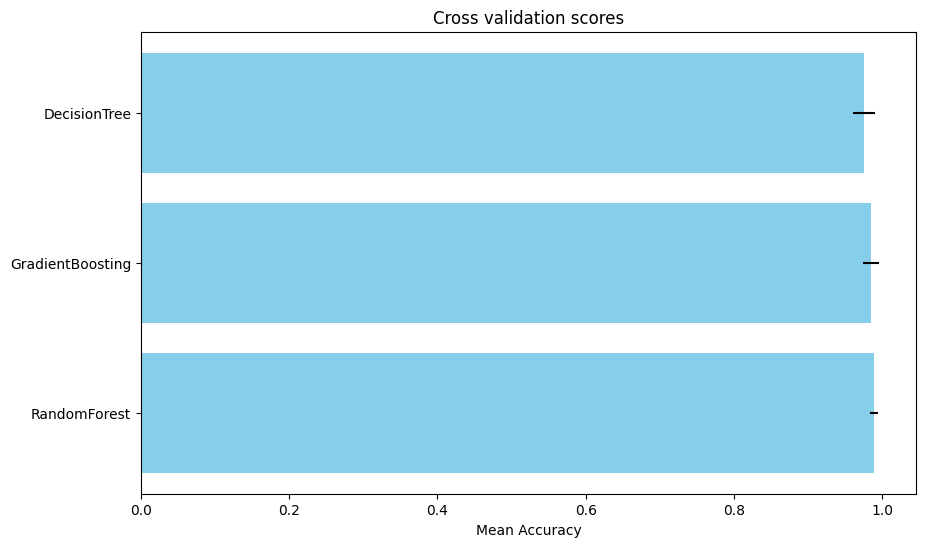

In [79]:
cv_results = pd.DataFrame({
    "Algorithm": ["RandomForest", "GradientBoosting", "DecisionTree"],
    "CrossValMeans": [pd.Series(score_rf).mean(), pd.Series(score_gb).mean(), pd.Series(score_dt).mean()],
    "CrossValErrors": [pd.Series(score_rf).std(), pd.Series(score_gb).std(), pd.Series(score_dt).std()]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(cv_results["Algorithm"], cv_results["CrossValMeans"], xerr=cv_results["CrossValErrors"], color="skyblue")
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")
plt.show()

#### Optimizing hyperparameters with SearchGridCV ###

So now that i have found the best model, i will aplied grid search to find the best hyperparameter.

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [81]:
random_forest_model = RandomForestClassifier(random_state=42)
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
# Apply GridSearchCV
grid_search_rf = GridSearchCV(random_forest_model, param_grid, cv=kf, scoring='accuracy')
best_model_grid = grid_search_rf.fit(x_train, y_train)

# Print the best hyperparameters for the Random Forest model
print("Random Forest Best Hyperparameters:", grid_search_rf.best_params_)
# Optionally, you can print other information such as the best score
print("Random Forest Best Accuracy:", grid_search_rf.best_score_)

Random Forest Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Accuracy: 0.9891708034565176


In [82]:
best_model = best_model_grid.best_estimator_

In [83]:
feature_importances = best_model.feature_importances_

In [84]:
feature_names = x_train.columns

In [85]:
indices = np.argsort(feature_importances)

In [86]:
from sklearn.feature_selection import SelectFromModel
# Use the best model for feature selection
sel = SelectFromModel(best_model)
sel.fit(x_train, y_train)
# Get selected features
selected_feat = x_train.columns[sel.get_support()]
# Print or use the selected features as needed
print(selected_feat)

Index(['closed_at', 'relationships', 'age'], dtype='object')


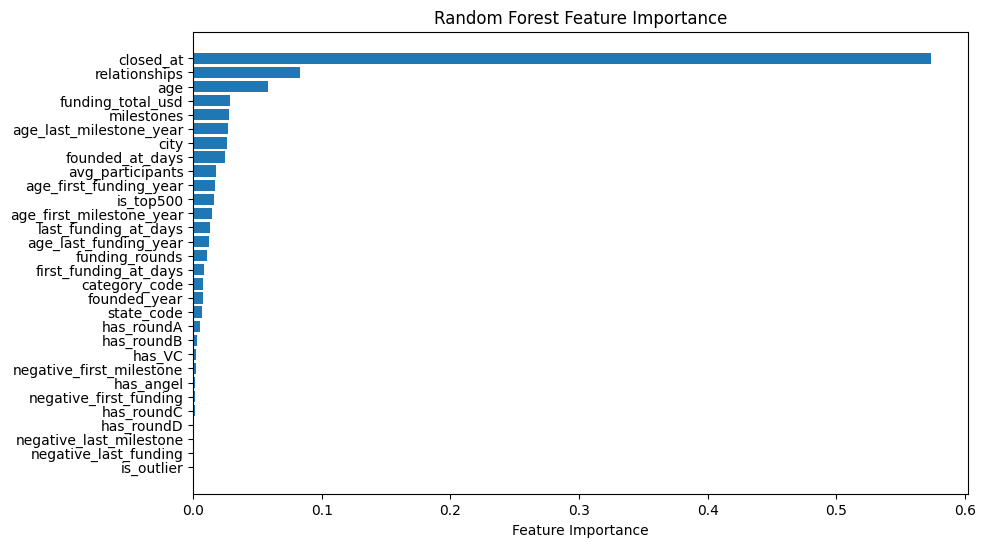

In [87]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [88]:
# Obtain the model's predictions on the test dataset
from sklearn.metrics import accuracy_score
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9945945945945946


In [89]:
predicted_df = pd.DataFrame(y_test_pred, columns= ["status"])

In [90]:
predicted_df ["status"].value_counts()

status
1    114
0     71
Name: count, dtype: int64

In [91]:
def model_performance(predicted_values, y_test):

    ### 8- Model Performance Visualization Confusion of Matrix 
    print("Confusion Matrix:")
    confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(
        y_test, predicted_values,
        labels = best_model.classes_,
        cmap = 'magma'
    );
    ### 9- Classification Report
    print("Classification Report:")
    report = classification_report(y_test, predicted_values, target_names = ['acquired', 'closed'])
    print(report)

    return confusion_matrix_display,report

Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

    acquired       0.99      1.00      0.99        70
      closed       1.00      0.99      1.00       115

    accuracy                           0.99       185
   macro avg       0.99      1.00      0.99       185
weighted avg       0.99      0.99      0.99       185



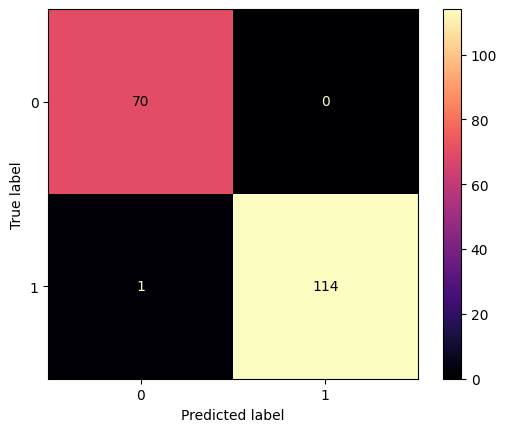

In [92]:
confusion_matrix_display,report= model_performance(y_test_pred, y_test)